## Testing K-Nearest Neighbors (Implemented from Scratch) - 

We are done with the implementation of KNN from scratch. Now, we just need to test it on a real world dataset to see how it does with a classification task. Next, I will also train the dataset with sklearn implementation of KNN and compare the results of both to see if we are any closer to it. 


### Dataset - 

I will use the famous Iris dataset for the Classification. It has 3 class labels. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import os
os.chdir('N:\Machine Learning')

#### Import the K-Nearest Neighbors and Util functions

In [15]:
from kneighbors import KNearestNeighbors
from ml_utils import minkowski, train_test_split, accuracy

#### Load the Iris dataset

In [3]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Target Labels

In [5]:
np.unique(Y)

array([0, 1, 2])

In [6]:
X.shape

(150, 4)

#### Target Distribution

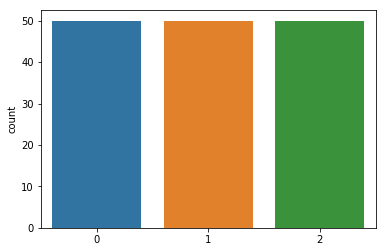

In [8]:
sns.countplot(Y)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_seed=40)

In [26]:
classifier = KNearestNeighbors(k=5, p_metric=2)
classifier.fit(X_train, Y_train)

In [27]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 2])

In [28]:
accuracy(Y_test, Y_pred)

0.9333333333333333

### Hyperparameter Tuning 

I have implemented the distance metric 'minkowski' so as to include both Euclidean and Manhattan distances. 
After trying a couple of values, I am using K=10 and p=1 for Manhattan distance as it performs better in this case. 

In [38]:
classifier = KNearestNeighbors(k=20, p_metric=1)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1])

In [39]:
accuracy(Y_test, Y_pred)

0.9666666666666667

So after just a bit of tuning, ***Custom implemented model of K-Nearest Neighbors is able to achieve 96.6% accuracy on test set which is great. ***


### Sklearn Implementation 

Now I will run the sklearn implementation of KNN and give the same hyperparameters and see what accuracy we get. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=20, p=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1])

In [46]:
accuracy(Y_test, Y_pred)

0.9666666666666667

***Great! so we get exactly similar result which means that we did not make any mistake in implementing KNN from scratch logically. ***


***We can further do a lot of things with this, feature scaling will improve the accuracy further as KNN is a distance based algorithm. We can use Ball Tree or KD Tree algorithm instead of Brute force for finding the Nearest Data points, etc. But my main aim in this was to implement KNN from scratch using only built in python libraries and understand its underlining Mathematics***
